In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [13]:
cols=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
df=pd.read_csv('magic04.data',names=cols)

In [14]:
df['class']=df['class'].map({'g':1,'h':0})
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


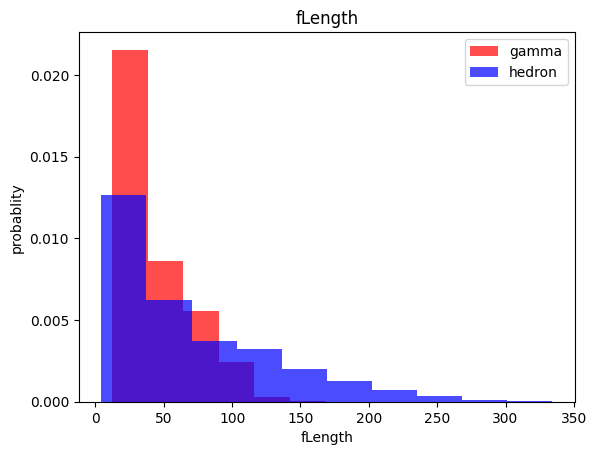

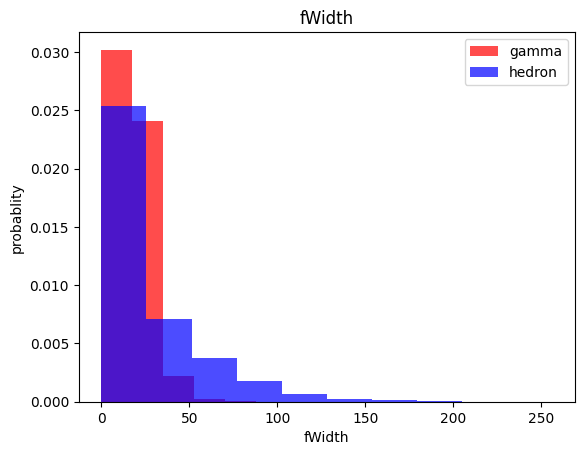

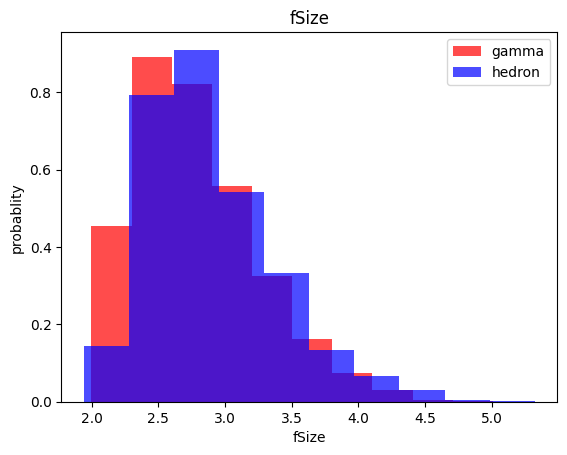

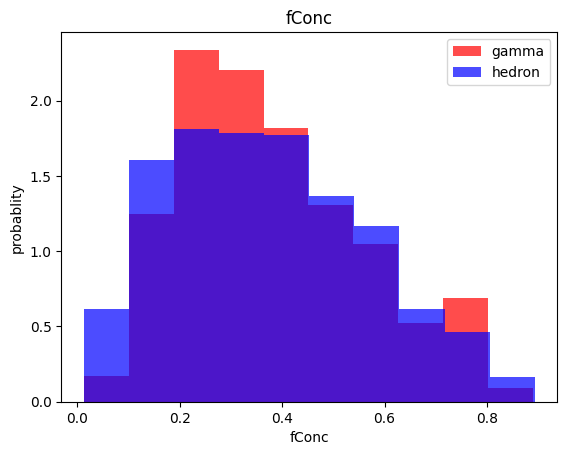

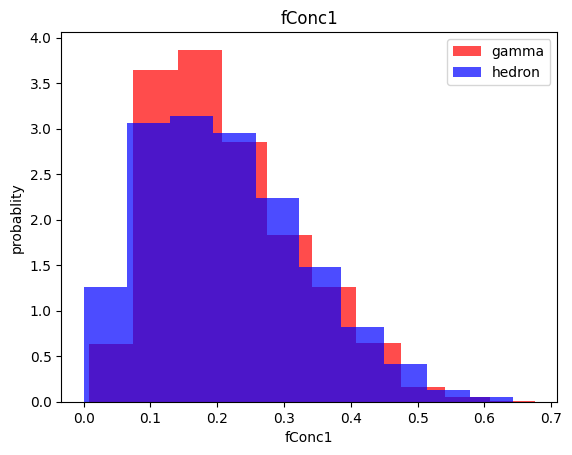

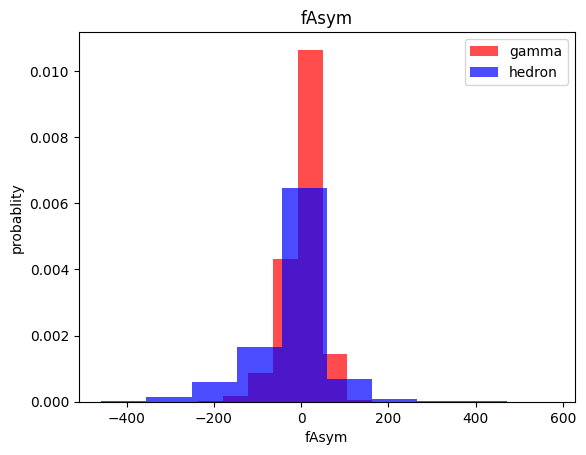

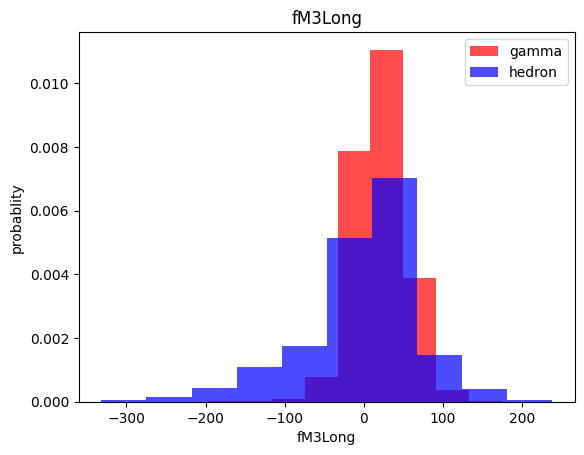

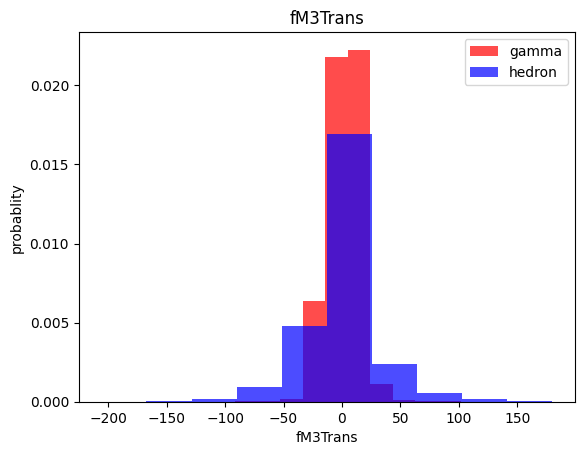

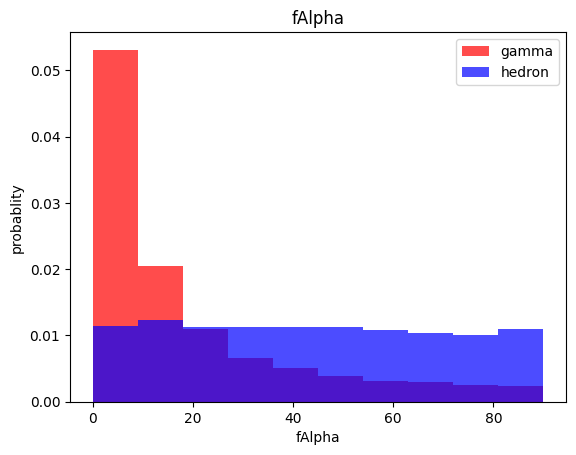

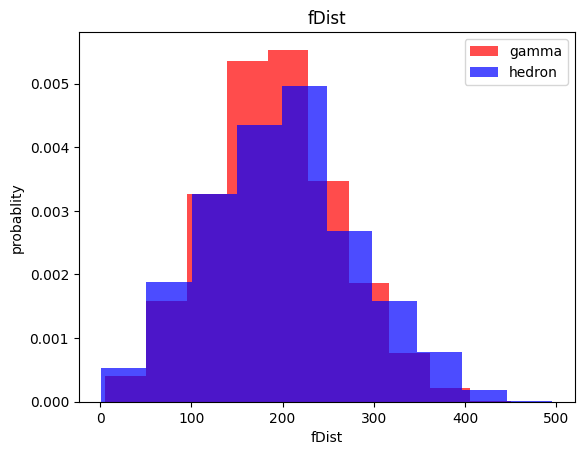

In [15]:
for label in cols[0:-1]:
    plt.hist(df[df['class']==1][label],color='red',alpha=0.7,label='gamma',density=True)
    plt.hist(df[df['class']==0][label],color='blue',alpha=0.7,label='hedron',density=True)
    plt.title(label)
    plt.ylabel('probablity')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [16]:
train,test,valid=np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [17]:
train.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
3412,66.2317,28.0831,3.4596,0.1374,0.0692,81.8702,48.5886,14.4011,8.1299,186.7150,1
12234,100.4930,21.3018,3.0158,0.2594,0.1644,-128.1600,76.2591,21.4862,2.8180,233.0320,1
12601,58.4820,29.5883,2.8879,0.3192,0.1843,-57.8135,38.1542,6.4472,6.9794,276.1824,0
15191,28.2374,16.2718,2.3720,0.4416,0.2272,-27.5441,-24.6387,-11.7319,40.3891,172.7860,0
17201,20.4682,17.3386,2.5453,0.5869,0.4088,3.2623,17.6107,17.9891,46.2043,227.2120,0


In [18]:
def scale_dataset(dataframe,oversample=False):
    x=dataframe[dataframe.columns[0:-1]].values
    y=dataframe[dataframe.columns[-1]].values
    scalar=StandardScaler()
    x=scalar.fit_transform(x)
    data=np.hstack((x,np.reshape(y,(-1,1))))
    if oversample:
        ros=RandomOverSampler()
        x,y=ros.fit_resample(x,y)
    return data,x,y
    
    

In [19]:
train,x_train,y_train=scale_dataset(train,oversample=True)
test,x_test,y_test=scale_dataset(test,oversample=False)
valid,x_valid,y_valid=scale_dataset(valid,oversample=False)

KNN METHOD

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
knn_model=KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)
y_pred=knn_model.predict(x_test)
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.66      0.76      0.70      1148
           1       0.89      0.83      0.86      2656

    accuracy                           0.81      3804
   macro avg       0.77      0.79      0.78      3804
weighted avg       0.82      0.81      0.81      3804



NAIVE BAYES METHOD

In [21]:
from sklearn.naive_bayes import GaussianNB
naive_model=GaussianNB()
naive_model.fit(x_train,y_train)
y_pred=naive_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.40      0.67      0.50       788
           1       0.89      0.73      0.81      3016

    accuracy                           0.72      3804
   macro avg       0.65      0.70      0.65      3804
weighted avg       0.79      0.72      0.74      3804



LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression
logic_model=LogisticRegression()
logic_model.fit(x_train,y_train)
y_pred=logic_model.predict(x_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.73      0.70      0.71      1388
           1       0.83      0.85      0.84      2416

    accuracy                           0.79      3804
   macro avg       0.78      0.77      0.78      3804
weighted avg       0.79      0.79      0.79      3804



SVM MODEL

In [23]:
from sklearn.svm import SVC
svm_model=SVC()
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
print(classification_report(y_pred,y_test))


              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1305
           1       0.90      0.89      0.89      2499

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



In [24]:
!pip install tensorflow

/bin/bash: /usr/local/bin/pip: /System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/: bad interpreter: No such file or directory


In [25]:
import tensorflow as tf

: 

: 